In [1]:
import matplotlib as mpl
from TrainedModels import *
from Datasets import Funnel
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, linewidth=120)
import h5py as h5
from glob import glob

%matplotlib inline

## Visualise data

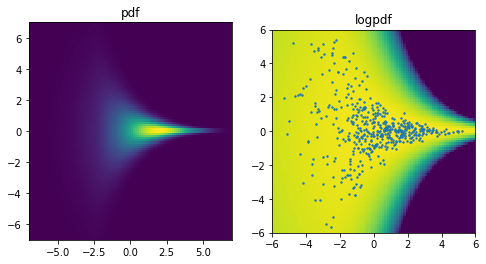

In [2]:
D = 2
p = Funnel(sigma=2, D=D, lim=10)

plot_size=14
ngrid = 100

eval_grid = np.linspace(-plot_size/2,plot_size/2,ngrid) 

eval_points = np.array([[xv,yv] + [0.01]*(D-2)
    for xv in eval_grid
            for yv in eval_grid])
#eval_points = np.random.randn(ngrid, D)

rand_train_data = p.sample(500)

fig, axes = plt.subplots(1,2,figsize=(8,4))

plt.scatter(rand_train_data[:,0],rand_train_data[:,1],2)
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.gca().set_aspect("equal")

logpdf = p.logpdf(eval_points)
logpdf = logpdf.reshape(ngrid,ngrid)
logpdf -= logpdf.max()+20
pdf    = np.exp(logpdf)
pdf /= pdf.sum()

ax = axes[0]
ax.pcolor(eval_grid, eval_grid, pdf.T,  zorder=0)
ax.set_title("pdf")
ax = axes[1]
ax.pcolor(eval_grid, eval_grid, logpdf.T, vmin=-100, zorder=0)
ax.set_title("logpdf")

### Format for `fn` :
1. `D`: dimensionality
1. `l`: number of layers
1. `seed`: random seed set for training

In [3]:
dname = "funnel"
D = 2
l = 2
seed = 8

fn = "f_D%02d_l%d_nd10_np150_nv150_tp2_ss10_ni10000_s%02d" % (D, l, seed)


# the feed for computing gradients and hessians

ntrain = 150
ntest = 500
bs = 500



INFO:tensorflow:Restoring parameters from ckpts/f_D02_l2_nd10_np150_nv150_tp2_ss10_ni10000_s08.ckpt


(-7.0, 7.0)

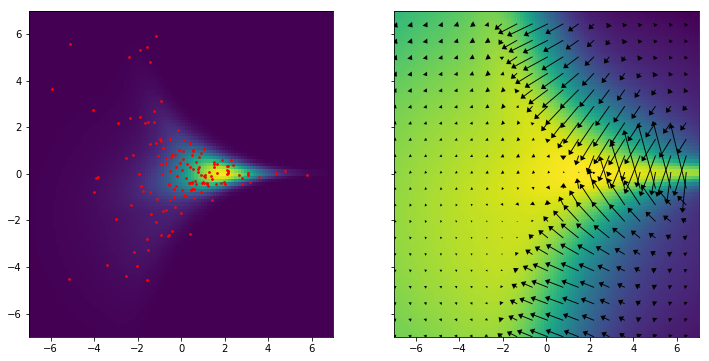

In [12]:
eval_points = np.array([[xv,yv] + [0.00]*(D-2)
    for xv in eval_grid
            for yv in eval_grid])

rand_train_data = p.sample(ntrain)
kn_model = TrainedDeepLite(fn, rand_train_data)
fv_value = kn_model.fun(eval_points)
gv_value = kn_model.grad(eval_points)


fv_value = fv_value.reshape(ngrid,ngrid)
gv_value = gv_value.reshape(ngrid,ngrid,D)

logpdf   = fv_value-fv_value.max()
pdf      = np.exp(logpdf)
pdf /= pdf.sum()
pdf = pdf.reshape(ngrid, ngrid)


fig, axes = plt.subplots(1,2,figsize=(12,6),sharex=True, sharey=True)

ax = axes[0]
ax.pcolor(eval_grid, eval_grid, pdf.T)
ax.scatter(rand_train_data[:,0], rand_train_data[:,1], 3, zorder=4, color="r")

ax = axes[1]
ax.pcolor(eval_grid, eval_grid, logpdf.T)
g_int = 5
ax.quiver(eval_grid[::g_int], eval_grid[::g_int], gv_value[::g_int,::g_int,0].T, 
           gv_value[::g_int,::g_int,1].T, scale=100, headaxislength=5,headlength=5, headwidth=7)

ax.set_xlim([eval_grid.min(), eval_grid.max()])
ax.set_ylim([eval_grid.min(), eval_grid.max()])